+ 아래는 가장 많이 사용하는 옵티마이저 리스트이다.

> 출처: https://needjarvis.tistory.com/685

경사 하강법(Gradient Descent)

확률적 경사 하강법(Stochastic Gradient Descent, SGD)

Momentum

Nesterov Accelerated Gradient (NAG)

Adam

AdaGrad

RMSProp

AdaMax

Nadam

+ 경사 하강법(Gradient Descent)

$$w_{t+1}=w_t - γ⋅∇L(w_t)$$

** γ Learning Rate

** L Loss function

>출처: https://needjarvis.tistory.com/685

Batch Gradient descent: BGD

**L**을 한 번 다 본 후에 loss를 구해서 weight를 업데이트하는 방법입니다. 그리고는 업데이트 하고는 수정된 weight로 전체 데이터셋에 대해 또다시 loss를 구하고는 weight를 업데이트 하기를 반복합니다.

In [ ]:
#psudo코드 BGD

for i in range(m):
	gradient=evaluate_gradient(training_data)
	weight=weight-learning_rate * gradient

Stochastic Gradient Descent: SGD

**데이터 1개**를 본 후에 바로 그거에 대해 weight update(한 걸음 가는 것)를 합니다. 그 다음 데이터를 보고는 또 이것에 대해 weight update를 합니다. 이를 전체 트레이닝 데이터셋에 있는 모든 데이터에 대해 1번씩 합니다. 그러면 트레이닝 데이터셋의 데이터 개수인 총 n번 update가 이루어집니다.

그리고는 데이터셋을 **랜덤하게 섞습니다(shuffle)**. 그리고는 또다시 트레이닝 데이터셋에서 1개씩 
데이터를 보면서 update를 해나갑니다. 그러면 전체 데이터셋을 1바퀴 돌 때마다 랜덤하게 shuffle을 해주기 때문에 각기 다른 순서로 update가 이루어집니다.

In [ ]:
#psudo코드 SGD

for i in range(m):
	np.random.shuffle(training_data)
	for one_data in training_data:
		gradient=evaluate_gradient(one_data)
		weight=weight-learning_rate * gradient

Mini-batch Gradient Descent

**데이터 B개(하나의 mini-batch)**를 본 후에 update가 이루어집니다. 이 방법은 앞선 두 방법을 적절히 버무려서 두 가지 장점을 다 취하는 것도 있지만, 다른 좋은 장점이 하나 더 생깁니다.

바로 **병렬처리**입니다. Mini-batch간의 loss를 구하고는 평균을 내서 update를 하게 되는데, 잘 처리하면 이 각 mini-batch에 대해 병렬처리가 가능하여 GPU가 도움을 줄 수 있습니다.

*Mini-batch Gradient Descent가 굉장히 보편화되어서 SGD라는 용어가 Mini-batch Gradient Descent를 의미하는 경우가 많습니다.

In [ ]:
#psudo코드 a.k.a SGD

for i in range(m):
	np.random.shuffle(training_data)
	for one_batch in get_mini_batches(training_data,one_batch_size=32):
		gradient=evaluate_gradient(one_batch)
		weight=weight-learning_rate * gradient

+ Gradient descent에서의 문제 상황

고차원에서는 saddle point가 훨씬 흔한 문제가 됩니다. 아래 그림은 Monkey saddle이라고 불리는 형태인데 딱 봐도 우리의 gradient descent 알고리즘이 저 곳에 안주할 가능성이 높아 보입니다. Saddle point 지점뿐만 아니라 그 주변 언저리는 평평하기 때문에 굉장히 더디게 진행하게 되는 문제점도 있습니다.

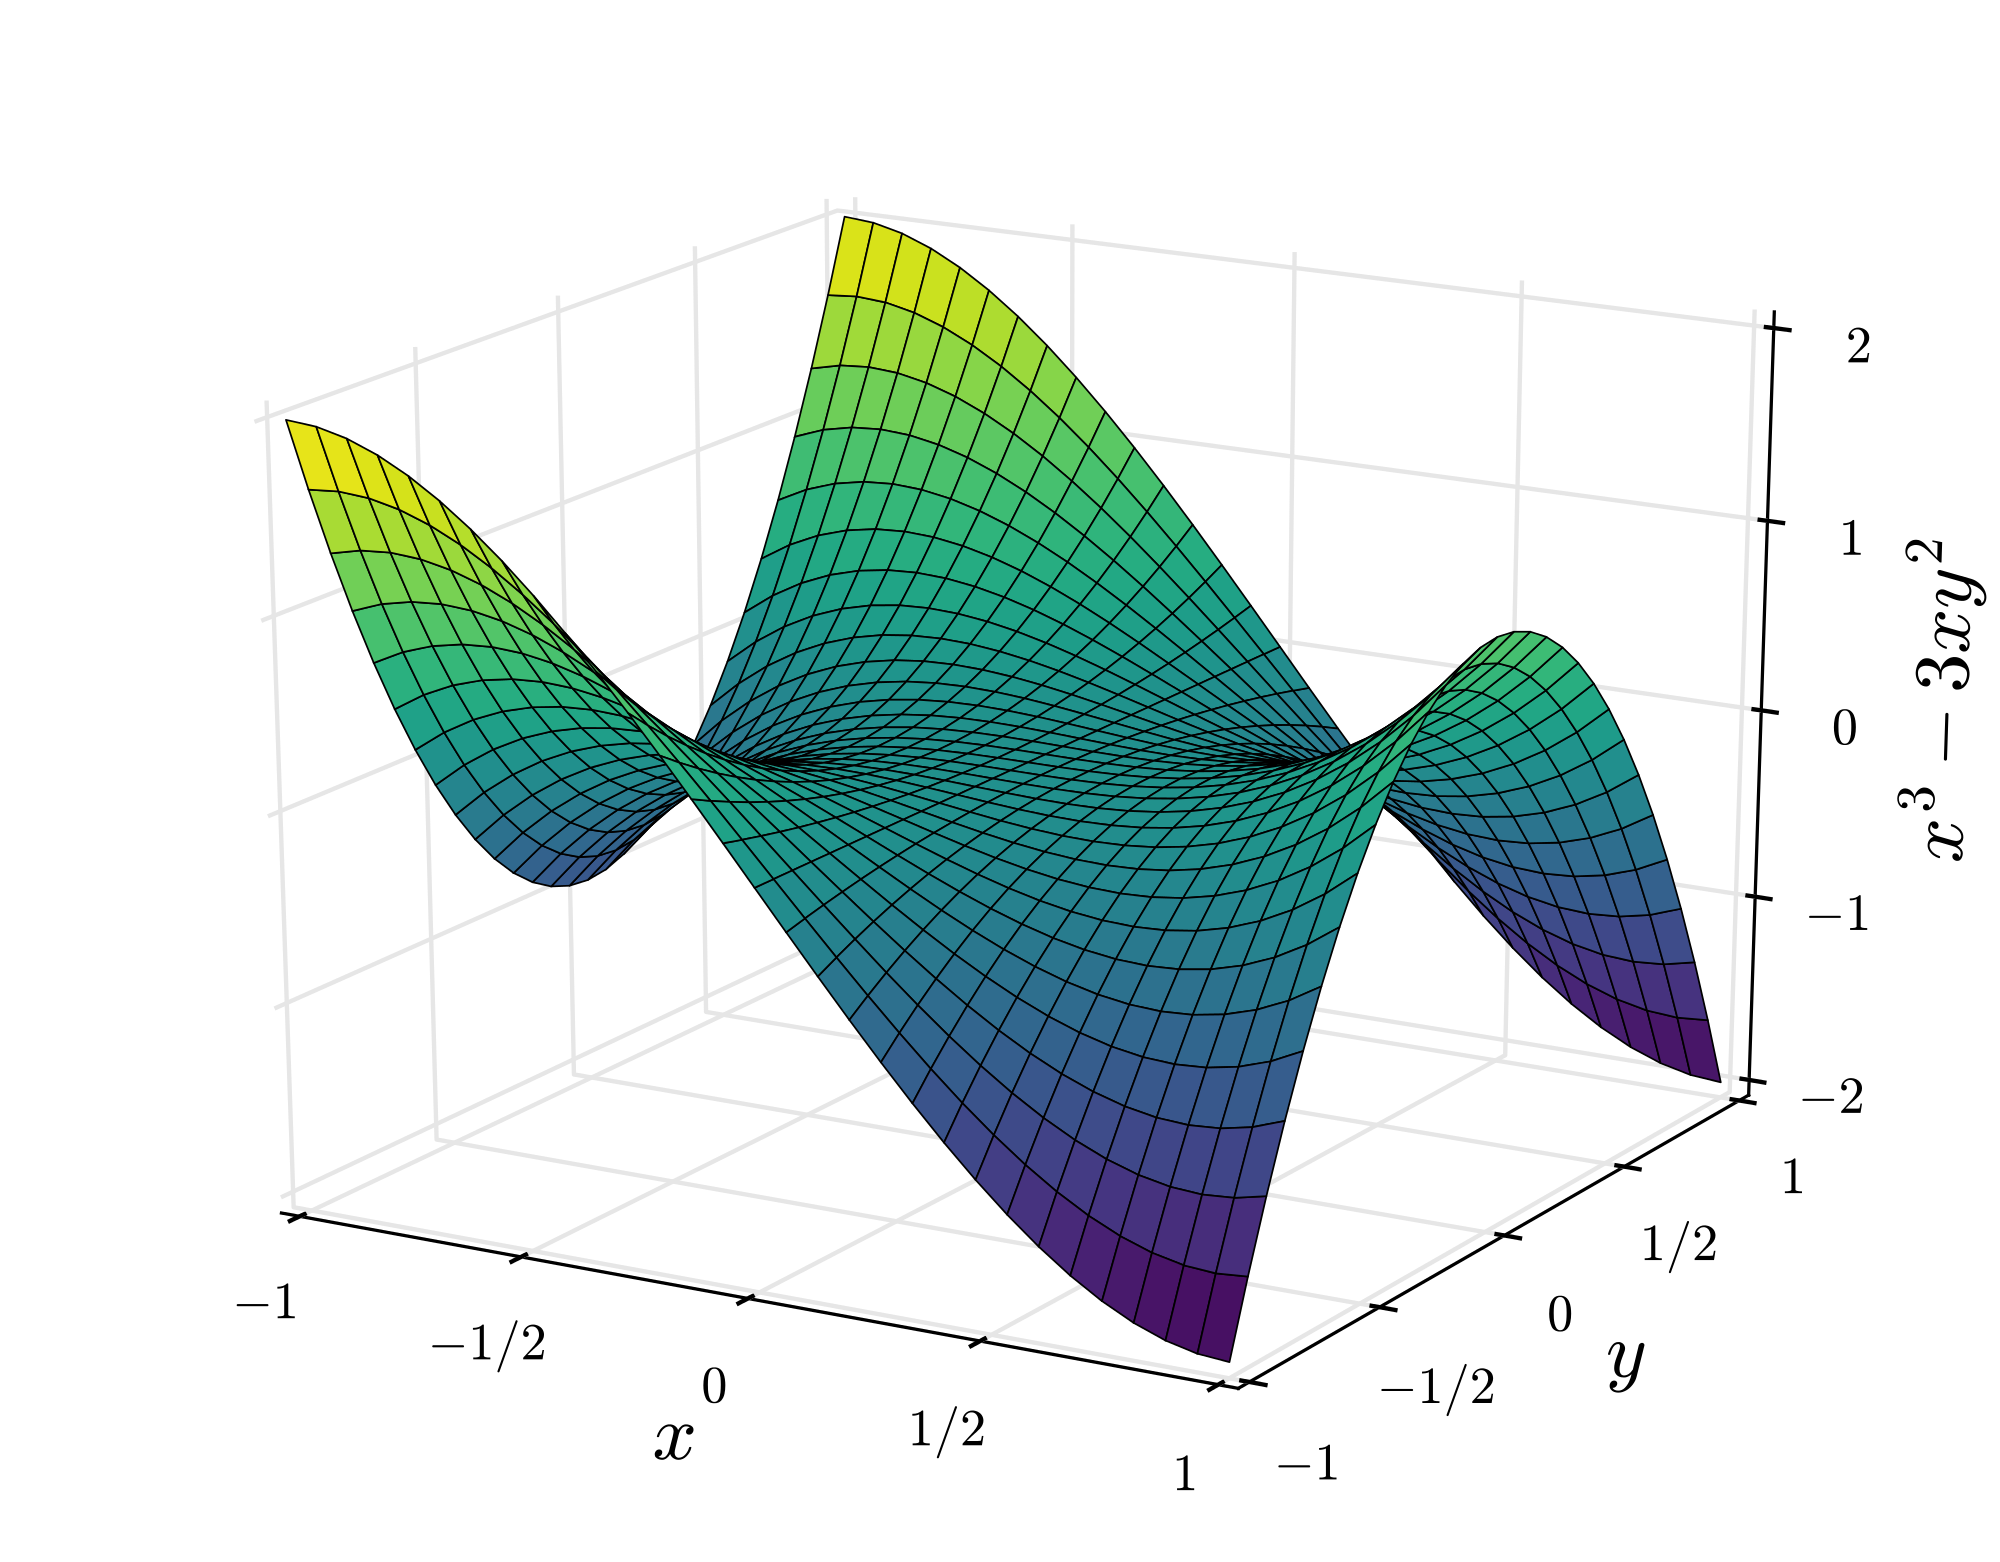

모든 데이터를 다 한꺼번에 고려한 후 1스텝을 가는 BGD가 SGD보다 더 최적의 루트(혹은 좋은 오솔길)로 산을 내려가게 됩니다. 그에 반해 결국 SGD도 적당한 곳으로 잘 내려가긴 하지만 다른 곳도 좀 헤매면서 내려갑니다.

이 헤매는 것을 어떻게 하면 좀 줄일 수 있을까, local minimum이나 saddle point에 어떻게 하면 안주하지 않게 할 수 있을까 이런 질문들에서 다른 여러 optimizer들이 등장합니다.

+ Momentum

$$w_{t+1}=w_t - γ⋅v_{t+1}$$
$$with$$
$$v_{t+1}=ρv_t + ∇L(w_t)$$

momentum 방식은 단순히 지금 현재의 gradient를 update vector로 보자는 것이 아니라, 이전 step에서의 update vector도 고려하자는 의미입니다. 한 마디로 말해 이전에 움직였던 방향(vt)도 어느정도(ρ) 고려해서 이번에 움직이자(−γ⋅vt+1)는 의미입니다.

이렇게 이전에 움직였던 방향도 고려를 해주는데 대개 ρ 는 0.9 언저리의 값으로 합니다. 이전에 갔던 방향도 계속 더해주기 때문에 속력이 아닌 속도(velocity)가 계속 붙습니다. 위의 공(ball) 비유로 들자면 공이 점점 내려가면서 속도가 붙습니다.

이런 점 덕분에 **local minimum이나 saddle point에 걸리더라도 velocity로 그 영역을 탈출**할 수 있습니다.

또한 특정 방향으로 자주 update가 이루어진다면, 그 방향에 velocity가 생겨서 지그재그로 왔다갔다 하는 상황에서도 velocity 덕분에 오른쪽 아래 그림처럼 앞으로 나아가며 **지그재그도 상쇄가 가능**합니다.

**참고 vt를 지수평균으로 표현

$$v_{t}=\Sigma^{t}_{i=0} ρ^{t-i} ∇L(w_i)$$

In [ ]:
#psudo code with momentum ρ

current_gradient=evaluate_gradient(w)
vector= rho * vector + current_gradient
weight = weight - learning_rate * vector

+ adjust learning late

우리가 optimum에 다다르고 있는데 그냥 지나치게 되는 경우도 발생할 수 있습니다. 왜냐하면 local minimum에 다가가는 상황임에도 아무래도 learning rate가 늘 일괄적으로 적용되고 있기 때문입니다.

+ Adagrad

$$w_{t+1}=w_t - \frac{γ}{\sqrt{G_{t+1}+ϵ}}⋅∇L(w_t)$$
$$with$$
$$G_{t+1}=G_t + (∇L(w_t))^2$$

+ G가 커지면 γ는 감소

+ 작은 ϵ 을 더하여 분모가 0이 되는 것을 방지

Adagrad라는 알고리즘은 한 마디로 요약하자면, 여태까지 많이 가보지 않았던 방향보다는 많이 갔던 방향에 대해 그 영향력을 점점 줄여나가는 방식입니다.

In [ ]:
current_gradient=evaluate_gradient(x)
grad_squared=grad_squared + current_gradient**2
weight= weight - learning_rate * current_gradient /(np.sqrt(grad_squared) + 1e-8)

+ Adam

흔히 어떤 두 개의 좋은 것이 있다면, 그 두 가지를 한 데 합치는 방식이 등장하곤 합니다. Optimizer도 예외는 아닙니다. 그렇게 **momentum과 gradient 히스토리** 모두를 고려하는 방식이 등장하였는데, 바로 Adam입니다. 이름에서부터 Adagrad + Momentum 이라는 느낌이 묻어납니다.

In [ ]:
first_moment=0
second_moment=0

for t in range(m):
	current_gradient=evaluate_gradient(x)

	first_moment=beta1*first_moment + (1-beta1)*current_gradient
	second_moment=beta2*second_moment +(1-beta2)*current_gradient**2

	unbiased_first=first_moment / (1-beta1**t)
	unbiased_second=second_moment / (1-beta2**t)

	weight=weight-learning_rate * unbiased_first / (np.sqrt(unbiased_second)+1e-8)


작성중..